In [2]:
from mnist import MNIST
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

In [5]:
mndata = MNIST('../data')
TrainingData = mndata.load_training()
TestData     = mndata.load_testing()

In [21]:
X_train = np.array(TrainingData[0])
Y_train = np.array(TrainingData[1]
X_test  = np.array(TestData[0]
Y_test  = np.array(TestData[1]

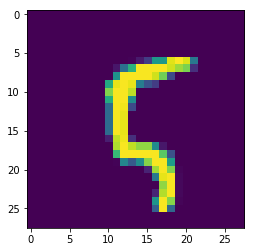

In [37]:
def Visualize(a):
    data = np.array(a).reshape((28, 28))
    imshow(data)

Visualize(X_train[100])